In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


# Data Modeling

## 데이터 수집

In [2]:
df = pd.read_csv('C:/workspaces/project/kaggle/data/d_final.csv', encoding = 'utf-8')\

In [3]:
df.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


In [4]:
df['DEATH'].value_counts()

0    88993
1    32402
Name: DEATH, dtype: int64

## 사망기간 예측을 위한 생존자 데이터 제거

- 사망한 사람 데이터만 필요함

In [5]:
df = df[df.DEATH == 1]
df['DEATH']

2         1
3         1
12        1
14        1
16        1
         ..
121381    1
121383    1
121384    1
121388    1
121392    1
Name: DEATH, Length: 32402, dtype: int64

In [6]:
df['DEATH'].value_counts()

1    32402
Name: DEATH, dtype: int64

## 변수 설정

- 정규화할 변수만 X에 저장
- y (종속변수)는 정규화 안하고 저장

In [7]:
X = df.loc[:, ['sex', 'intubed','age_grp','pneumonia','pregnancy', 
               'diabetes', 'copd', 'asthma','inmsupr','hypertension',
               'other_disease','cardiovascular','obesity', 'renal_chronic', 
               'tobacco', 'contact_other_covid', 'covid_res', 'icu']]

Y = df.loc[:, ['diff_days']]

## 정규화

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
t_train_raw = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

In [10]:
t_train_raw

array([[0.  , 0.5 , 0.75, ..., 1.  , 0.  , 0.5 ],
       [1.  , 0.5 , 0.5 , ..., 1.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.75, ..., 1.  , 0.  , 0.5 ],
       ...,
       [1.  , 0.5 , 0.75, ..., 1.  , 1.  , 0.5 ],
       [0.  , 0.  , 0.25, ..., 0.  , 1.  , 0.5 ],
       [1.  , 0.  , 0.5 , ..., 0.5 , 1.  , 0.  ]])

##### train/test 데이터 셋 분리

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1004)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25921, 18) (6481, 18) (25921, 1) (6481, 1)


---
---
---
---
---

# Random Forest

In [14]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

##### Model Learning

In [15]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

C:\Users\u\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [16]:
Y_pred = rf.predict(x_test)

In [17]:
Y_test2 = y_test.loc[:, "diff_days"]
Y_test2 = Y_test2.reset_index(drop=True)

In [18]:
mse = mean_squared_error(Y_test2, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test2, Y_pred))
print('MSE : %.3f' % (mse))
print('RMSE : %.3f' % (rmse))

MSE : 57.378
RMSE : 7.575


##### X축 : Y, Y축 : predicted Y 산점도 작성

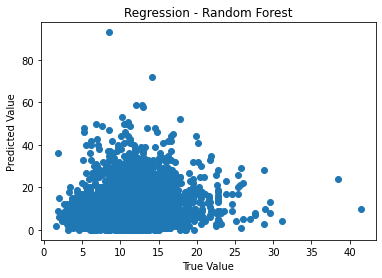

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(Y_pred, Y_test2, 'o')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Regression - Random Forest')
plt.show()

##### Y, Predicted Y export (나중에 그래프 그릴 때 사용)

In [20]:
d_trueY = pd.DataFrame({'Y_true': Y_test2}).reset_index(drop=True)
d_predY = pd.DataFrame({'Y_pred': Y_pred})

In [21]:
reg_rf=pd.concat([d_trueY, d_predY], axis=1).reset_index(drop=True)
reg_rf

,Y_true,Y_pred
0,8,3.667833
1,14,10.326316
2,7,11.831424
3,15,8.519485
4,16,13.747397
...,...,...
6476,11,11.263658
6477,17,8.716622
6478,16,11.248430
6479,15,10.538435


In [22]:
reg_rf.to_csv('C:/workspaces/project/kaggle/result/reg_rf.csv', encoding='utf-8', index=False, line_terminator='\n')